In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
# I already have the data, no need for aggregation here.
# Just import CSV

ml_df = pd.read_csv("team_spacing_stats_1.csv")

In [69]:
ml_df.head()

,avg_diff,std_diff,min_diff,avg,std,min,won
0,13.147888,-8.871796,20.447128,732.81240,252.10709,128.043470,0
1,25.839600,12.738190,52.958984,739.84600,254.70096,154.503230,0
2,116.601260,-51.265976,125.013350,808.26440,243.89949,184.962720,1
3,-60.157227,-3.847626,-71.654030,682.68414,242.51976,67.342900,0
4,27.493225,-8.829681,-22.478172,758.91190,267.81036,89.147095,1


In [70]:
ml_df[ml_df.isna().any(axis=1)]

,avg_diff,std_diff,min_diff,avg,std,min,won
53,NaN,NaN,NaN,NaN,NaN,NaN,1
138,NaN,NaN,NaN,801.87390,291.77316,75.09818,0
144,NaN,NaN,NaN,NaN,NaN,NaN,0
262,NaN,NaN,NaN,751.45294,239.97018,173.15350,1
431,NaN,NaN,NaN,NaN,NaN,NaN,0
551,NaN,NaN,NaN,795.89490,277.42798,135.38090,0
570,NaN,NaN,NaN,793.08920,255.33382,250.18274,0
1229,NaN,NaN,NaN,644.03906,233.88348,140.22672,1
1557,NaN,NaN,NaN,757.44244,274.74716,216.50505,0
1642,NaN,NaN,NaN,NaN,NaN,NaN,1


In [71]:
ml_df.dropna(inplace=True)

In [72]:
features = ['avg_diff', 'std_diff', 'min_diff'] 
X = ml_df[features]
y = ml_df['won']

In [73]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Model A: Logistic Regression (Good baseline, easy to interpret)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [75]:
# Model B: Random Forest (Captures complex, non-linear relationships)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [76]:
print("--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

--- Logistic Regression Results ---
Accuracy: 0.5142
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       302
           1       0.51      0.55      0.53       297

    accuracy                           0.51       599
   macro avg       0.51      0.51      0.51       599
weighted avg       0.51      0.51      0.51       599



In [77]:
print("\n--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred)) 


--- Random Forest Results ---
Accuracy: 0.4975
              precision    recall  f1-score   support

           0       0.50      0.55      0.53       302
           1       0.49      0.44      0.47       297

    accuracy                           0.50       599
   macro avg       0.50      0.50      0.50       599
weighted avg       0.50      0.50      0.50       599



In [78]:
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

D:\TEMP\ipykernel_2636\219411280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


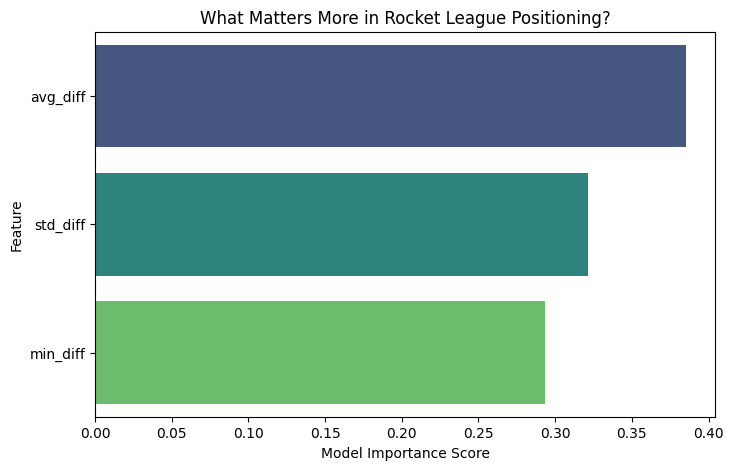

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("What Matters More in Rocket League Positioning?")
plt.xlabel("Model Importance Score")
plt.savefig("feature_importance.png")
plt.show()

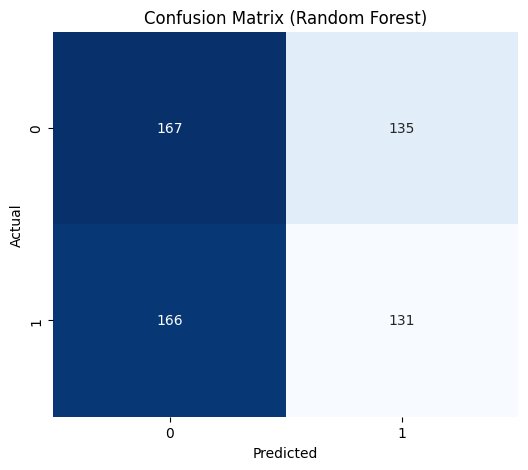

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.savefig("confusion_matrix.png")
plt.show()

2980 rows for clustering after dropping NA.
--- Team Archetypes Found ---
         avg_spacing  std_spacing  min_spacing
cluster                                       
0         709.389262   245.375436   133.671810
1         778.998031   251.755908   204.934789
2         751.265098   272.923920   115.138628


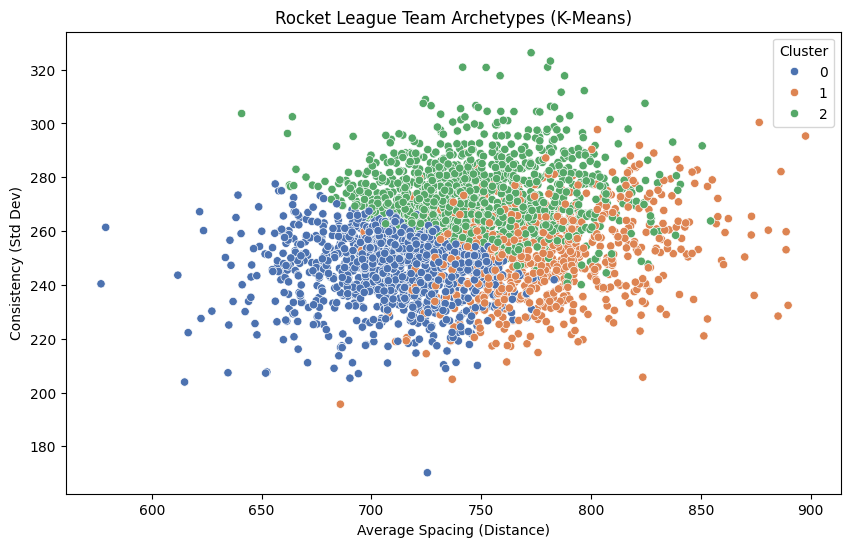

--- Win Rate by Cluster ---
cluster
0    0.463698
1    0.512755
2    0.523646
Name: won, dtype: float64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ml_df_unsup = pd.read_csv("team_spacing_stats.csv").dropna()
# 1. SELECT FEATURES
# We use the spacing metrics to find "Archetypes" of teams
features = ['avg_spacing', 'std_spacing', 'min_spacing']
X_cluster = ml_df_unsup[features].dropna()
print(len(X_cluster), "rows for clustering after dropping NA.")
# 2. STANDARDIZE (Crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 3. RUN K-MEANS (Let's try 3 Clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
ml_df_unsup['cluster'] = kmeans.fit_predict(X_scaled)

# 4. ANALYZE THE CLUSTERS
# Group by cluster to see what they represent
cluster_stats = ml_df_unsup.groupby('cluster')[features].mean()
print("--- Team Archetypes Found ---")
print(cluster_stats)

# 5. VISUALIZE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ml_df_unsup, x='avg_spacing', y='std_spacing', hue='cluster', palette='deep')
plt.title("Rocket League Team Archetypes (K-Means)")
plt.xlabel("Average Spacing (Distance)")
plt.ylabel("Consistency (Std Dev)")
plt.legend(title='Cluster')
plt.savefig("kmeans_clusters.png")
plt.show()

print("--- Win Rate by Cluster ---")
print(ml_df_unsup.groupby('cluster')['won'].mean())